# review 수 가져오기
- 아래 사진 속 ‘(286)’과 같은 도서 별 리뷰 수와 해당 도서의 isbn을 추출할 것입니다.
- 추가로 제목과 작가명, 판매가격도 함께 추출합니다.

isbn.png

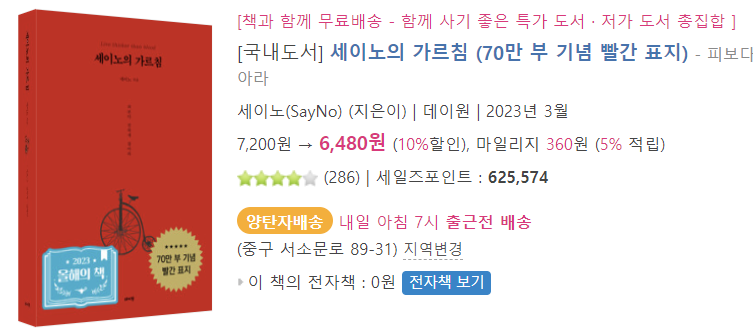

In [1]:
# 함수를 지정합니다.

def get_data(temp):
  start = 1
  temp = temp.select('ul > li')
  if len(temp) == 4:
    start = 0

  for idx , tag_ in enumerate(temp[start:]) :
    if idx ==0:
      title = tag_.select_one('b').text
    elif idx == 1:
      str_ = tag_.text.split('|')[0]
      author = str_
    elif idx == 2:
      price = tag_.select_one('span.ss_p2').text
    elif idx == 3:
      # print(f"세일즈 포인트 : {tag_.select_one('b').text.strip()}")
      review_count = tag_.find('a').text
  return title,author,price,review_count

import re
def get_isbn_pattern(temp):
  html = str(temp)
  # 정규 표현식을 사용하여 ISBN 값 찾기
  isbn_pattern = re.compile(r"ISBN=([A-Z0-9]+)")
  match = isbn_pattern.search(html)
  if match:
      isbn = match.group(1)
      # print(isbn)
  # else:
      # print("ISBN을 찾을 수 없습니다.")
  return isbn


- 알라딘 웹페이지에는 한 페이지 당 지정 년도의 50위까지만 보여줍니다. 따라서, url의 ‘year’값과 ‘page’값을 변경해 리뷰 수를 크롤링할 것입니다.
    - ex) page=1 → 1-50위, page=2 → 51-100위 등

In [5]:
# example) 2019년 1-50위

import requests
from bs4 import BeautifulSoup

url = 'https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=YearlyBest&BranchType=1&CID=0&Year=2019&page=1&cnt=300&SortOrder=1'

response = requests.get(url)

if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    total_lists = []
    for temp in soup.select('div.ss_book_box'):
      list_ = []
      try:
        list_.append(get_isbn_pattern(temp))

        temp = temp.select('div.ss_book_list')[0]
        list_ += list(get_data(temp))
        total_lists.append(list_)
      except Exception as E:
        print(temp.select('a.go_view2'))
        print(E)

else :
    print(response.status_code)

import pandas as pd
pd.DataFrame(total_lists)

print(total_lists)

#엑셀로 변경

import pandas as pd

# total_lists를 이용하여 데이터프레임 생성
df = pd.DataFrame(total_lists)

# CSV 파일로 저장 (인코딩은 utf-8로 설정)
df.to_csv('2019_1.csv', encoding='utf-8-sig', index=False)


[['8954655971', '여행의 이유', '김영하 (지은이) ', '12,150원', '403'], ['K722532337', '공부머리 독서법', '최승필 (지은이) ', '14,850원', '141'], ['K442636505', '오늘도 펭수 내일도 펭수', 'EBS, 펭수 (지은이) ', '15,300원', '347'], ['8965422787', '해커스 토익 기출 VOCA (보카)', 'David Cho (지은이) ', '11,610원', '78'], ['K832534441', '아주 작은 습관의 힘', '제임스 클리어 (지은이), 이한이 (옮긴이) ', '14,400원', '148'], ['K492635392', '숨', '테드 창 (지은이), 김상훈 (옮긴이) ', '14,850원', '128'], ['8965135583', '유럽 도시 기행 1', '유시민 (지은이) ', '14,850원', '125'], ['K542635103', '박막례, 이대로 죽을 순 없다', '박막례, 김유라 (지은이) ', '13,320원', '135'], ['8954655815', '2019 제10회 젊은작가상 수상작품집', '박상영, 김희선, 백수린, 이주란, 정영수, 김봉곤, 이미상 (지은이) ', '11,700원', '82'], ['8917230563', 'ETS 토익 정기시험 기출문제집 1000 Vol.1 Reading', 'ETS (엮은이) ', '16,020원', '17'], ['K412635007', '연의 편지', '조현아 (지은이) ', '14,850원', '148'], ['8934985062', '팩트풀니스', '한스 로슬링, 올라 로슬링, 안나 로슬링 뢴룬드 (지은이), 이창신 (옮긴이) ', '17,820원', '201'], ['8937473135', '82년생 김지영', '조남주 (지은이) ', '12,600원', '1126'], ['8917230555', 'ETS 토익 정기시험 기출문제집 1000 Vol.1 Listening', 'ET